In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris)

{'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n           

In [6]:
import pandas as pd
set = '/home/cesar/anaconda2/envs/py2/lib/python2.7/site-packages/sklearn/datasets/data/iris.csv'
iris_csv = pd.read_csv(set)

In [7]:
iris_csv.head()

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_csv.tail()

,150,4,setosa,versicolor,virginica
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
data = pd.DataFrame({'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target})
data.head()

,petal length,petal width,sepal length,sepal width,species
0,1.4,0.2,5.1,3.5,0
1,1.4,0.2,4.9,3.0,0
2,1.3,0.2,4.7,3.2,0
3,1.5,0.2,4.6,3.1,0
4,1.4,0.2,5.0,3.6,0


In [10]:
from sklearn.model_selection import train_test_split
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [12]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

In [14]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.9555555555555556)


In [17]:
# Prediction for a single item
clf.predict([[2, 3, 4, 2]])

array([2])

In [ ]:
### Means Virginica

In [18]:
feature_importance = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_importance

petal length (cm)    0.466167
petal width (cm)     0.398338
sepal length (cm)    0.107029
sepal width (cm)     0.028466
dtype: float64

In [22]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

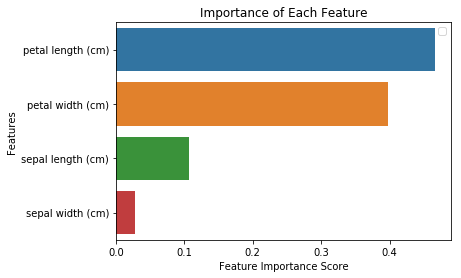

In [31]:
%matplotlib inline
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.legend()
plt.show()

In [32]:
# let's remove the feature that's almost irrelevant for the prediction 
X = data[['sepal length', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels

In [34]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print('Accuracy', metrics.accuracy_score(y_test, y_pred))

('Accuracy', 0.9777777777777777)
